# Instagram Bot Classification Model

Citations
* Dr. Ryan Ahmed

# TASK #1: PROBLEM STATEMENT AND BUSINESS CASE

FAKE INSTAGRAM ACCOUNT DETECTOR


*   Build and train a deep neural network model to detect spam (fake) Instagram accounts
*   Fake and spam accounts are a major problem in social media. Many social media influencers use fake Instagrama accounts to create an illusion of having so many social media followers
*   Fake accounts can be used to (1) impersonate or catfish other people, (2) be used to sell fake services/products

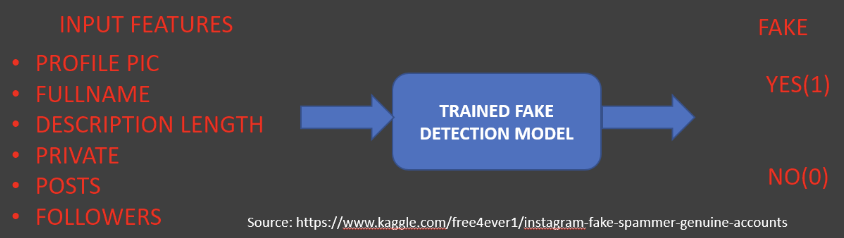

*Note: Code developed from Ryan Ahmed, Ph.D.*

# TASK #2: IMPORT DATASETS AND LIBRARIES

In [ ]:
# Changed this to install the most recent version of tensorflow
!pip install tensorflow==2.15.0

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix


In [ ]:
# ONLY RUN ONCE
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Addded this so subsequent chunk can run
!pip install jupyterthemes

In [ ]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
# setting the style of the notebook to be monokai theme
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them.

In [ ]:
# Upload training dataset -- ONLY RUN ONCE, I've uploaded file to DIIG Data folder
from google.colab import files
uploaded = files.upload()

Saving insta_train.csv to insta_train (1).csv


In [ ]:
# Upload testing dataset -- ONLY RUN ONCE, I've uploaded file to DIIG Data folder
from google.colab import files
uploaded = files.upload()

Saving insta_test.csv to insta_test (1).csv


In [ ]:
# Load the training dataset
instagram_df_train = pd.read_csv('insta_train.csv')
instagram_df_train

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.00,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.00,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.00,0,0,0,1,13,159,98,0
3,1,0.00,1,0.00,0,82,0,0,679,414,651,0
4,1,0.00,2,0.00,0,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1


In [ ]:
# Load the testing data
instagram_df_test = pd.read_csv('insta_test.csv')
instagram_df_test

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0
...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811,1
116,1,0.40,1,0.00,0,0,0,0,4,150,164,1
117,1,0.00,2,0.00,0,0,0,0,3,833,3572,1
118,0,0.17,1,0.00,0,0,0,0,1,219,1695,1


In [ ]:
# Print the first and last 5 rows in both the training and testing DataFrames
instagram_df_train.head(5)

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [ ]:
instagram_df_train.tail(5)

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1
575,1,0.27,1,0.00,0,0,0,0,2,150,487,1


In [ ]:
instagram_df_test.head(5)

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0


In [ ]:
instagram_df_test.tail(5)

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
115,1,0.29,1,0.0,0,0,0,0,13,114,811,1
116,1,0.40,1,0.0,0,0,0,0,4,150,164,1
117,1,0.00,2,0.0,0,0,0,0,3,833,3572,1
118,0,0.17,1,0.0,0,0,0,0,1,219,1695,1
119,1,0.44,1,0.0,0,0,0,0,3,39,68,1


# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS

In [ ]:
# Getting dataframe info
instagram_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [ ]:
# Get the statistical summary of the dataframe
instagram_df_train.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


In [ ]:
# Checking if null values exist
instagram_df_train.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [ ]:
# Get the number of unique values in the "profile pic" feature
instagram_df_train['profile pic'].value_counts()

1    404
0    172
Name: profile pic, dtype: int64

In [ ]:
# Get the number of unique values in "fake" (Target column)
instagram_df_train['fake'].value_counts()

0    288
1    288
Name: fake, dtype: int64

In [ ]:
# Perform exploratory data analysis on the testing dataset

# Getting dataframe info
instagram_df_test.info()
# Get the statistical summary of the dataframe
instagram_df_test.describe()
# Checking null values
instagram_df_test.isnull().sum()
# Get the number of unique values in the profile pic
instagram_df_test['profile pic'].value_counts()
# Get the number of unique values
instagram_df_test['fake'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           120 non-null    int64  
 1   nums/length username  120 non-null    float64
 2   fullname words        120 non-null    int64  
 3   nums/length fullname  120 non-null    float64
 4   name==username        120 non-null    int64  
 5   description length    120 non-null    int64  
 6   external URL          120 non-null    int64  
 7   private               120 non-null    int64  
 8   #posts                120 non-null    int64  
 9   #followers            120 non-null    int64  
 10  #follows              120 non-null    int64  
 11  fake                  120 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 11.4 KB


0    60
1    60
Name: fake, dtype: int64

# TASK #4: PERFORM DATA VISUALIZATION

<Axes: xlabel='fake', ylabel='count'>

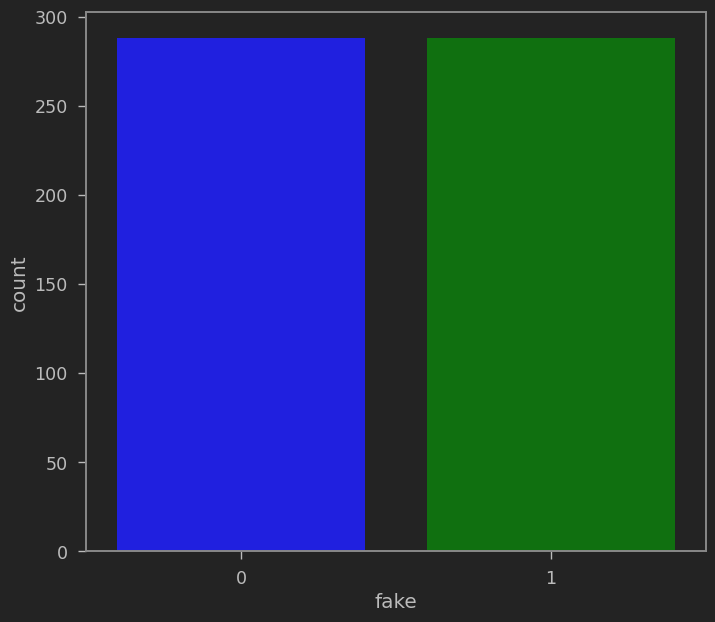

In [ ]:
# Visualize the data
#sns.countplot(instagram_df_train['fake']) DOESN'T WORK CORRECTLY

sns.countplot(x='fake', data=instagram_df_train, palette=['blue', 'green'])

<Axes: xlabel='private', ylabel='count'>

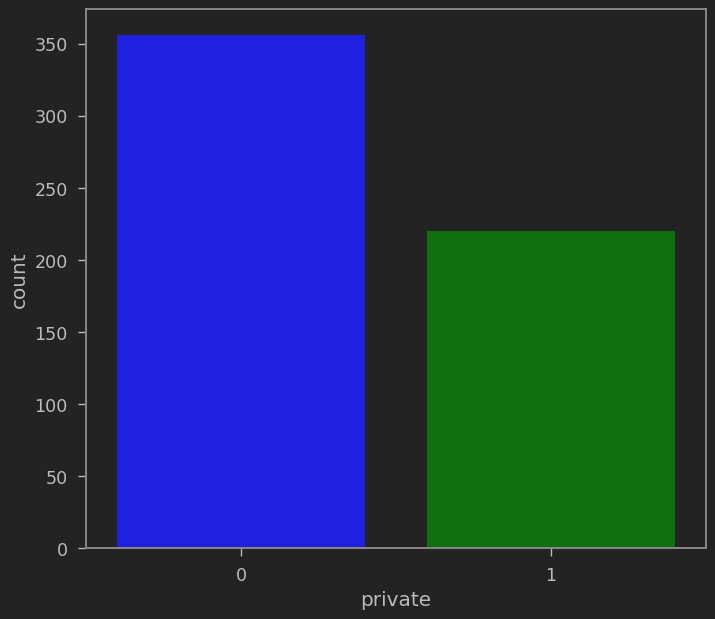

In [ ]:
# Visualize the private column data
# sns.countplot(instagram_df_train['private']) DOESN'T WORK CORRECTLY

sns.countplot(x='private', data=instagram_df_train, palette=['blue', 'green'])

<Axes: xlabel='profile pic', ylabel='count'>

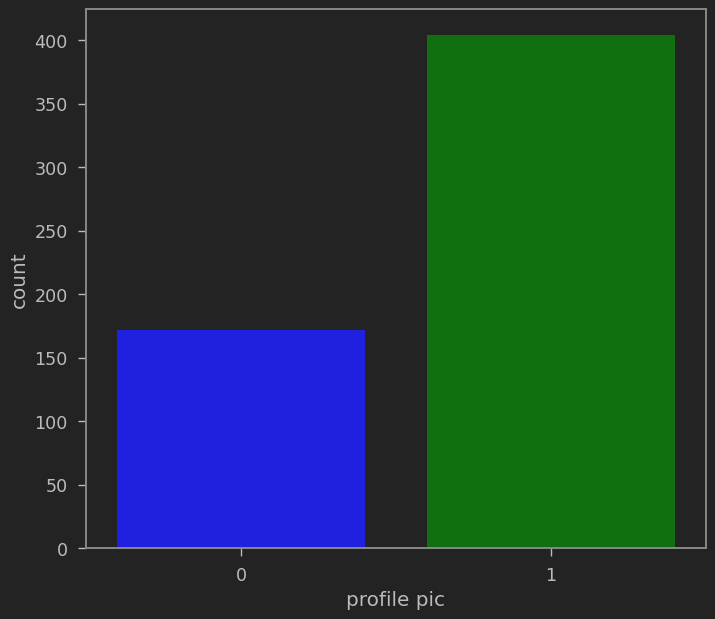

In [ ]:
# Visualize the "profile pic" column data
#sns.countplot(instagram_df_train['profile pic']) DOESN'T WORK CORRECTLY

sns.countplot(x='profile pic', data=instagram_df_train, palette=['blue', 'green'])

<ipython-input-28-a4342b479b01>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(instagram_df_train['nums/length username'])


<Axes: xlabel='nums/length username', ylabel='Density'>

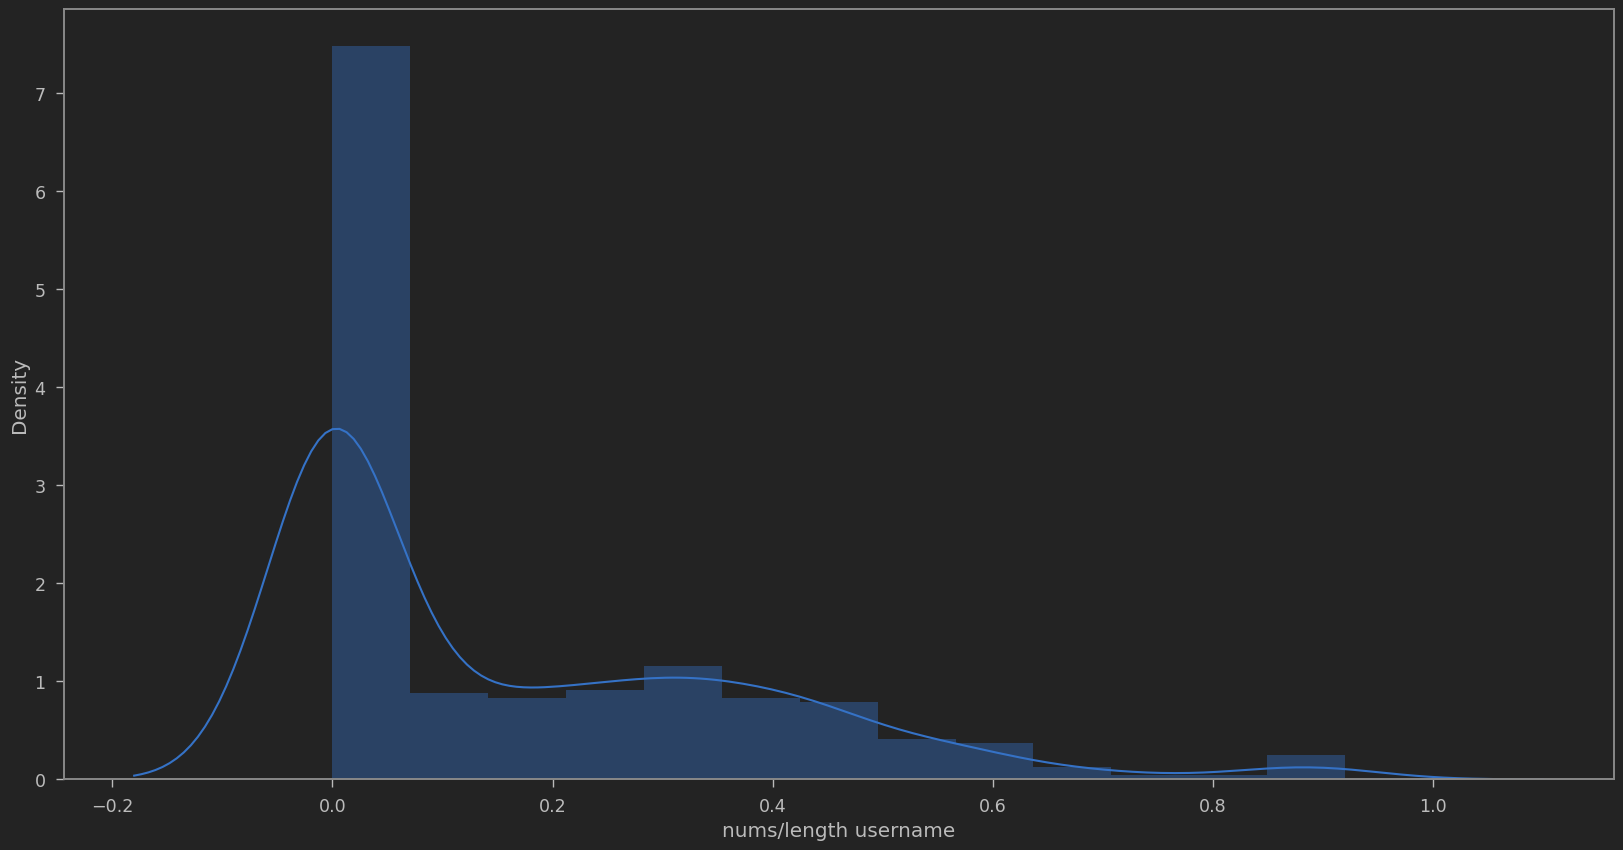

In [ ]:
# Visualize the data
plt.figure(figsize = (20, 10))
sns.distplot(instagram_df_train['nums/length username'])

<Figure size 2000x2000 with 0 Axes>

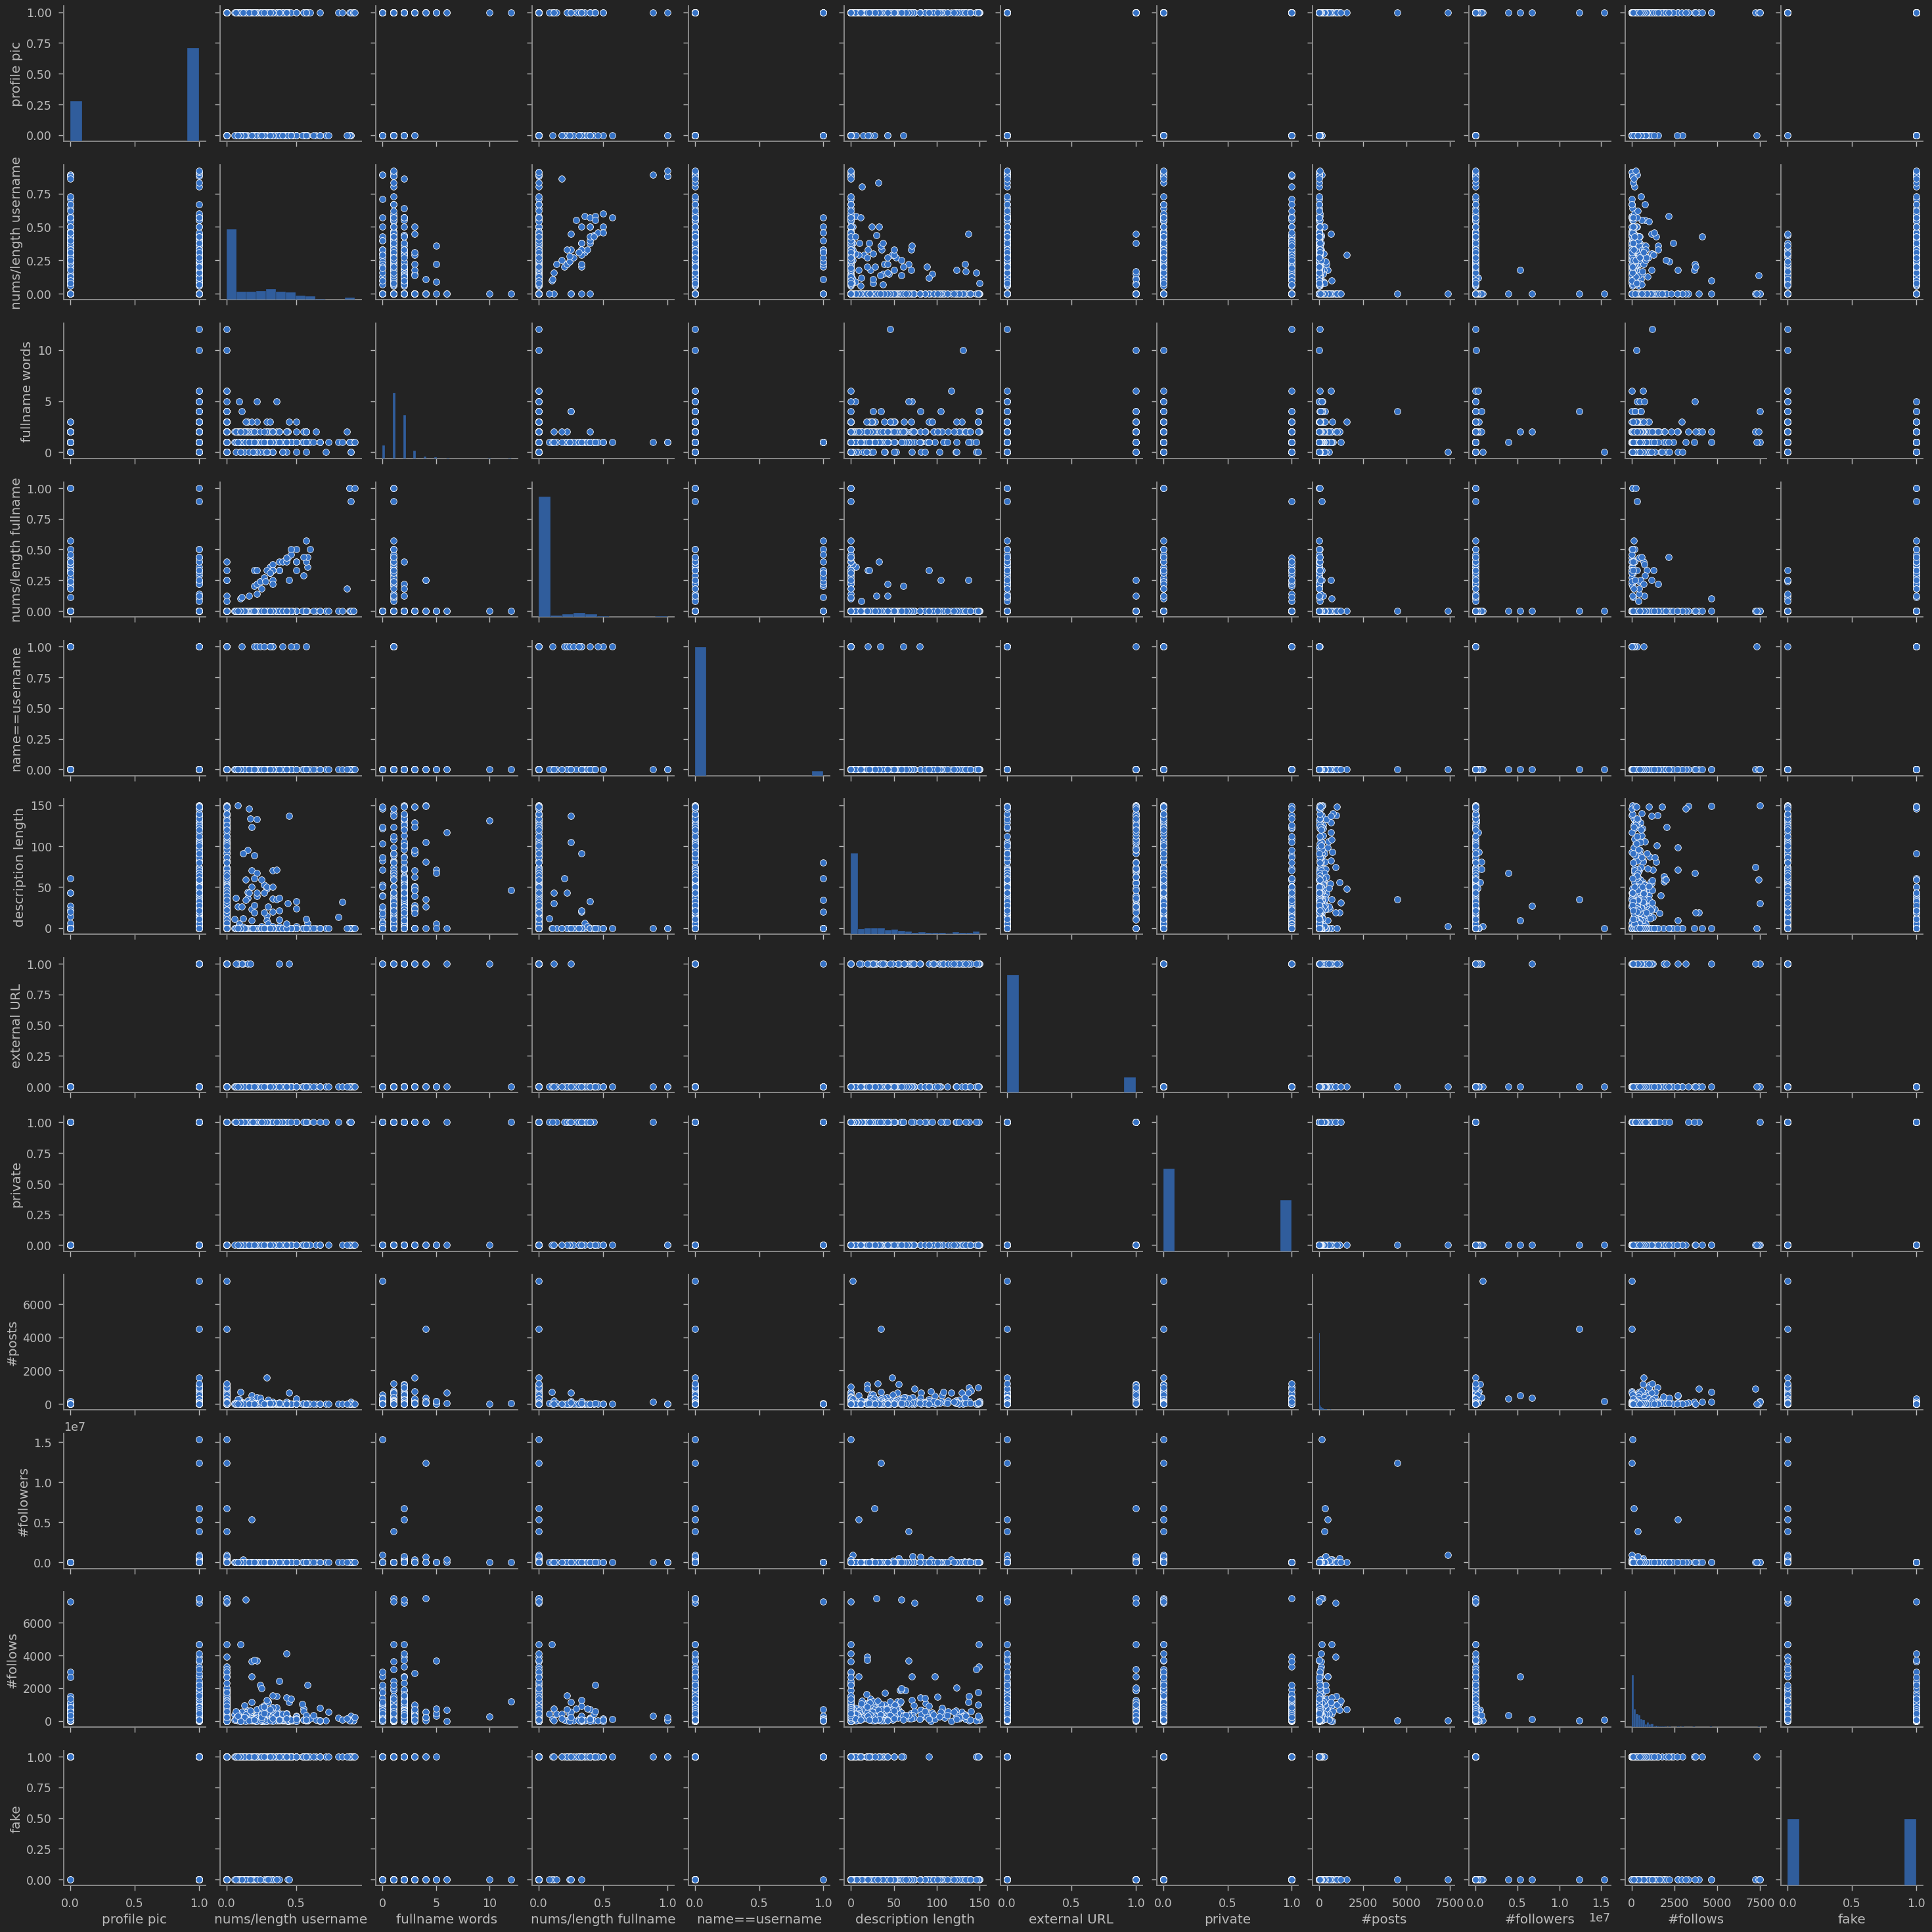

In [ ]:
# Plot pairplot
plt.figure(figsize = (20, 20))
sns.pairplot(instagram_df_train)

<Axes: >

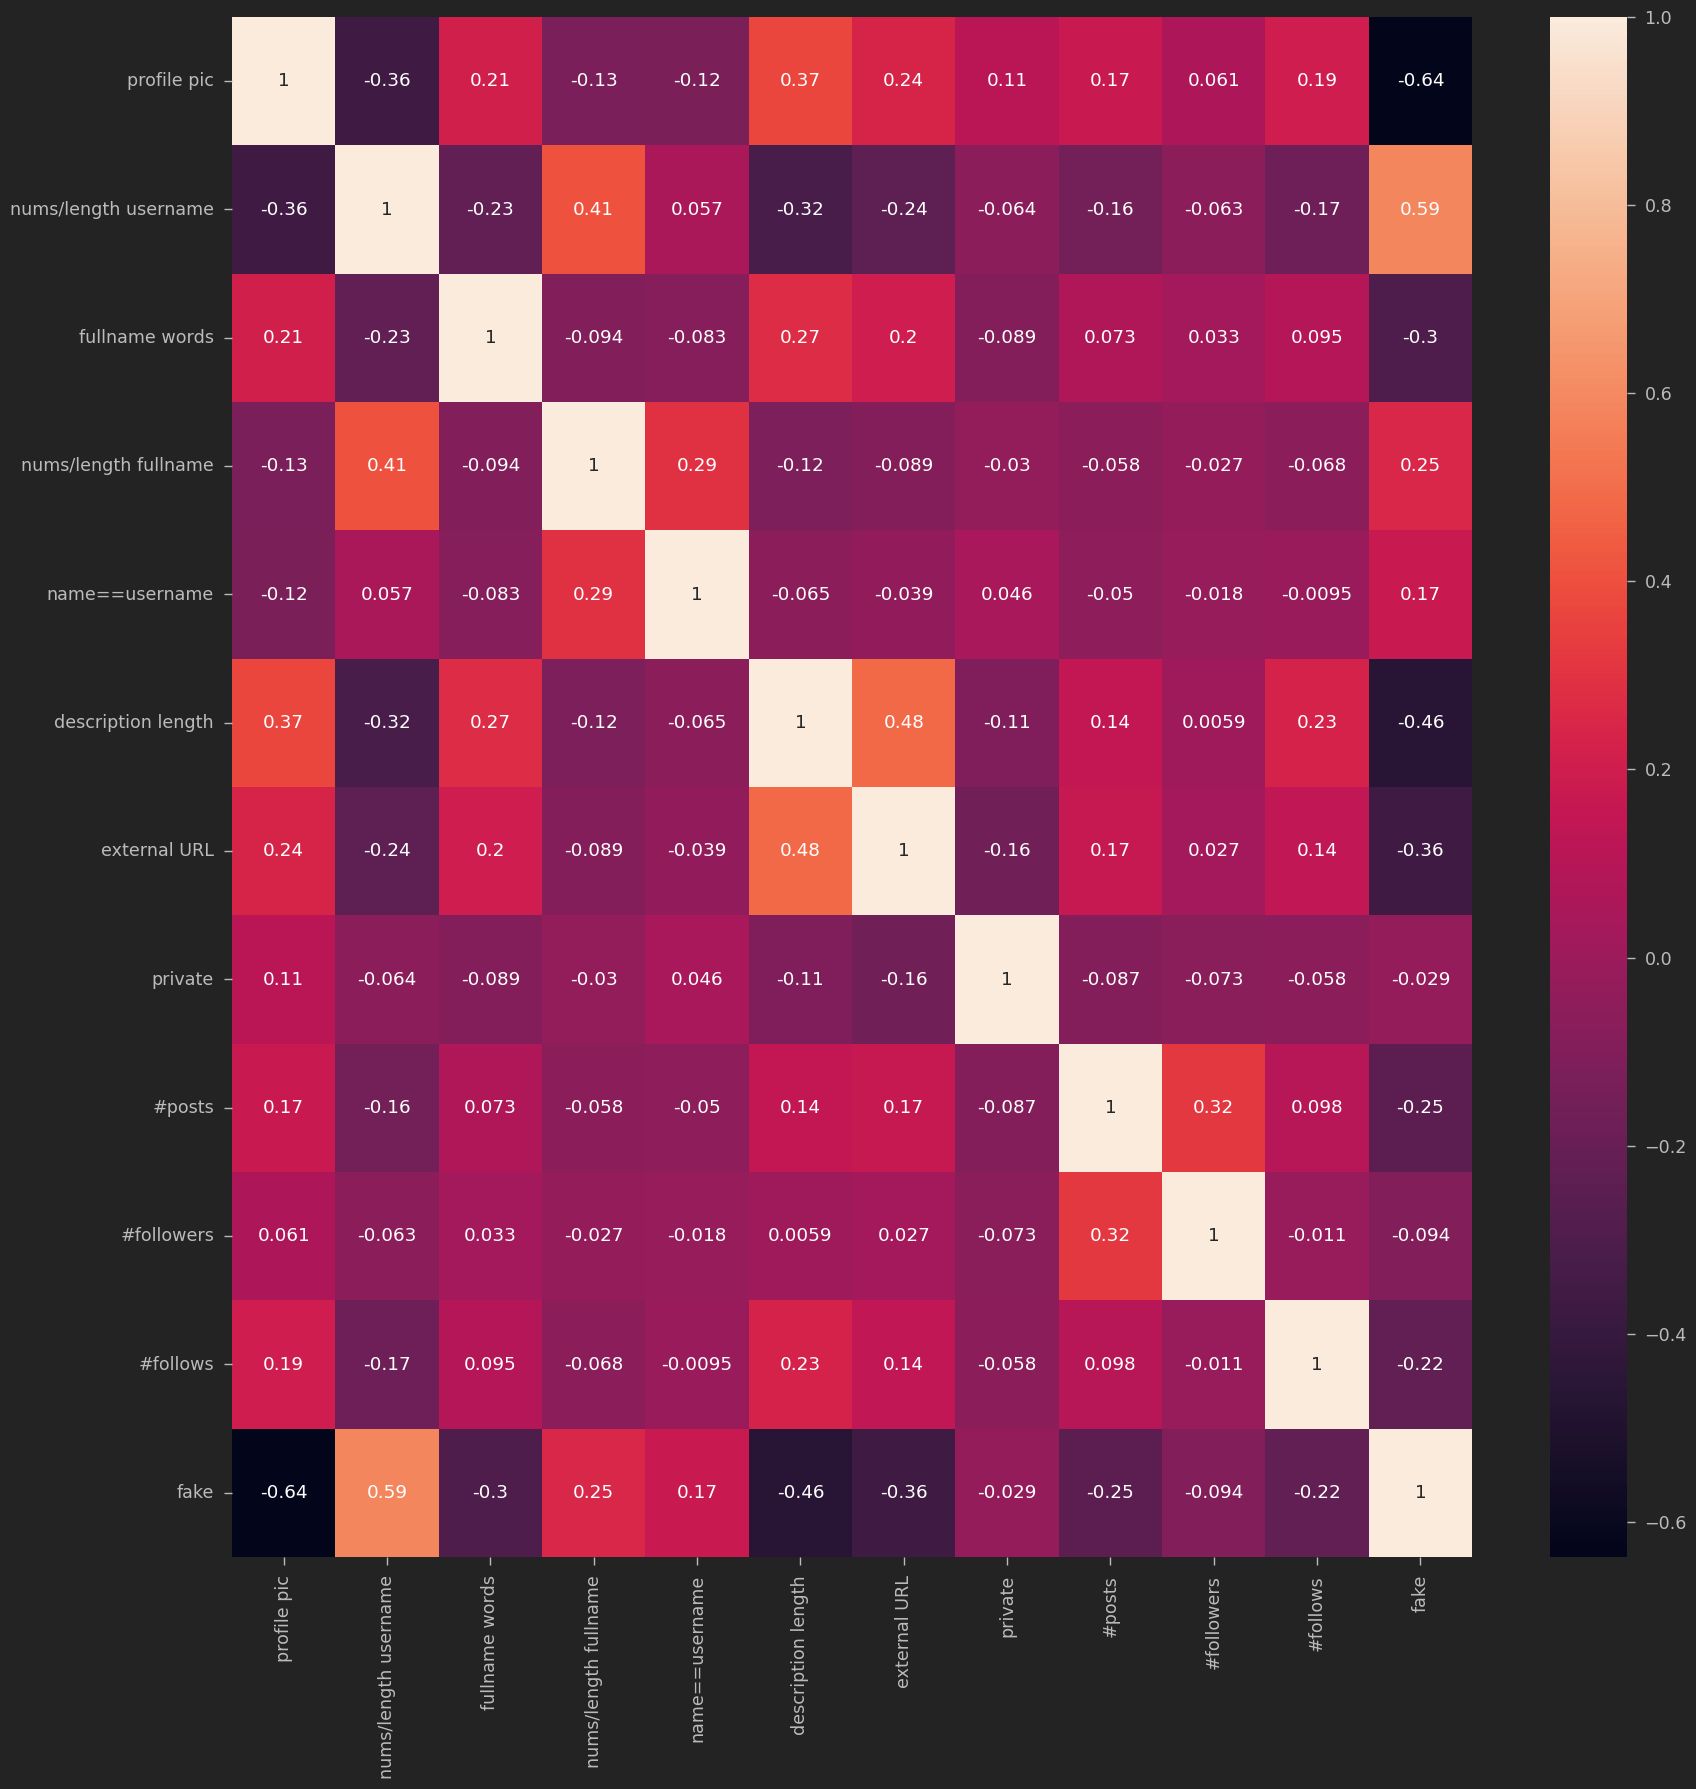

In [ ]:
# Correlation plot
plt.figure(figsize=(20, 20))
cm = instagram_df_train.corr()
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

In [ ]:
# Plot the count plot for 'fake', 'profile pic' and 'private' testing dataset

sns.countplot(instagram_df_test['fake'])

sns.countplot(instagram_df_test['private'])

sns.countplot(instagram_df_test['profile pic'])

# TASK #5: PREPARE THE DATA TO FEED THE MODEL

In [ ]:
# Training and testing dataset (inputs)
X_train = instagram_df_train.drop(columns = ['fake', 'profile pic'])
X_test = instagram_df_test.drop(columns = ['fake', 'profile pic'])
X_train

# Please note that the EDA includes profile pic, but that is dropped here because it is not present in the scraped dataset.

,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,0.27,0,0.00,0,53,0,0,32,1000,955
1,0.00,2,0.00,0,44,0,0,286,2740,533
2,0.10,2,0.00,0,0,0,1,13,159,98
3,0.00,1,0.00,0,82,0,0,679,414,651
4,0.00,2,0.00,0,0,0,1,6,151,126
...,...,...,...,...,...,...,...,...,...,...
571,0.55,1,0.44,0,0,0,0,33,166,596
572,0.38,1,0.33,0,21,0,0,44,66,75
573,0.57,2,0.00,0,0,0,0,4,96,339
574,0.57,1,0.00,0,11,0,0,0,57,73


In [ ]:
X_test

,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,0.33,1,0.33,1,30,0,1,35,488,604
1,0.00,5,0.00,0,64,0,1,3,35,6
2,0.00,2,0.00,0,82,0,1,319,328,668
3,0.00,1,0.00,0,143,0,1,273,14890,7369
4,0.50,1,0.00,0,76,0,1,6,225,356
...,...,...,...,...,...,...,...,...,...,...
115,0.29,1,0.00,0,0,0,0,13,114,811
116,0.40,1,0.00,0,0,0,0,4,150,164
117,0.00,2,0.00,0,0,0,0,3,833,3572
118,0.17,1,0.00,0,0,0,0,1,219,1695


In [ ]:
# Training and testing dataset (Outputs)
y_train = instagram_df_train['fake']
y_test = instagram_df_test['fake']

In [ ]:
y_train

0      0
1      0
2      0
3      0
4      0
      ..
571    1
572    1
573    1
574    1
575    1
Name: fake, Length: 576, dtype: int64

In [ ]:
y_test

0      0
1      0
2      0
3      0
4      0
      ..
115    1
116    1
117    1
118    1
119    1
Name: fake, Length: 120, dtype: int64

In [ ]:
# Scale the data before training the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

In [ ]:

y_train = tf.keras.utils.to_categorical(y_train, num_classes = 2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes = 2)

In [ ]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
y_test

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [ ]:
# Print the shapes of training and testing datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((576, 10), (120, 10), (576, 2), (120, 2))

In [ ]:
# % of training data
Training_data = len(X_train)/( len(X_test) + len(X_train) ) * 100
Training_data

82.75862068965517

In [ ]:
# % of testing data
Testing_data = len(X_test)/( len(X_test) + len(X_train) ) * 100
Testing_data

17.24137931034483

# TASK #6: UNDERSTAND THE THEORY AND INTUITION BEHIND NEURAL NETS

Please see https://docs.google.com/document/d/1huNbL-HJUAtaf3xiD4RKNVT48NgcOChFg5SsdLMUcrc/edit?usp=sharing (DIIG Data folder, titled "Neural Networks Information").

# TASK #7: UNDERSTAND THE THEORY AND INTUITION BEHIND NEURAL NETWORKS TRAINING

Please see https://docs.google.com/document/d/1huNbL-HJUAtaf3xiD4RKNVT48NgcOChFg5SsdLMUcrc/edit?usp=sharing (DIIG Data folder, titled "Neural Networks Information").

# TASK #8: BUILD AND TRAIN A SIMPLE DEEP LEARNING MODEL

In [ ]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Add a new hidden layer with 25 neurons and 'relu' activation function
# Print out the model summary and inicate how many trainable parameters
model = Sequential()
model.add(Dense(50, input_dim=10, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))
model.summary()

# Trainable params: 12,677

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 50)                550       
                                                                 
 dense_11 (Dense)            (None, 150)               7650      
                                                                 
 dropout_6 (Dropout)         (None, 150)               0         
                                                                 
 dense_12 (Dense)            (None, 25)                3775      
                                                                 
 dropout_7 (Dropout)         (None, 25)                0         
                                                                 
 dense_13 (Dense)            (None, 25)                650       
                                                                 
 dropout_8 (Dropout)         (None, 25)               

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
epochs_hist = model.fit(X_train, y_train, epochs = 20,  verbose = 1, validation_split = 0.1)

# Retrain the model for more epochs (30) and reassess model performance. Comment on the results.
# epochs_hist = model.fit(X_train, y_train, epochs = 30,  verbose = 1, validation_split = 0.1)

Epoch 1/20
17/17 [==============================] - 2s 28ms/step - loss: 0.6765 - accuracy: 0.6023 - val_loss: 0.6856 - val_accuracy: 0.6034
Epoch 2/20
17/17 [==============================] - 0s 8ms/step - loss: 0.5973 - accuracy: 0.7606 - val_loss: 0.5573 - val_accuracy: 0.8621
Epoch 3/20
17/17 [==============================] - 0s 17ms/step - loss: 0.4871 - accuracy: 0.8224 - val_loss: 0.3474 - val_accuracy: 0.9138
Epoch 4/20
17/17 [==============================] - 0s 24ms/step - loss: 0.4108 - accuracy: 0.8282 - val_loss: 0.2633 - val_accuracy: 0.9310
Epoch 5/20
17/17 [==============================] - 0s 16ms/step - loss: 0.3700 - accuracy: 0.8571 - val_loss: 0.2284 - val_accuracy: 0.9310
Epoch 6/20
17/17 [==============================] - 0s 11ms/step - loss: 0.3554 - accuracy: 0.8533 - val_loss: 0.2433 - val_accuracy: 0.9310
Epoch 7/20
17/17 [==============================] - 0s 10ms/step - loss: 0.3548 - accuracy: 0.8436 - val_loss: 0.1929 - val_accuracy: 0.9310
Epoch 8/20
17/

# TASK #9: ASSESS THE PERORMANCE OF TRAINED MODEL

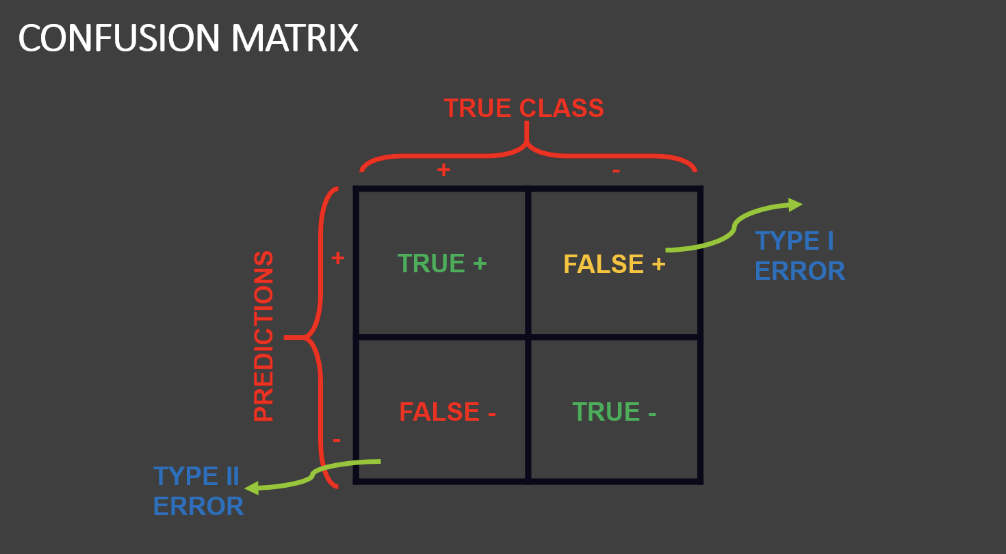

In [ ]:
print(epochs_hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


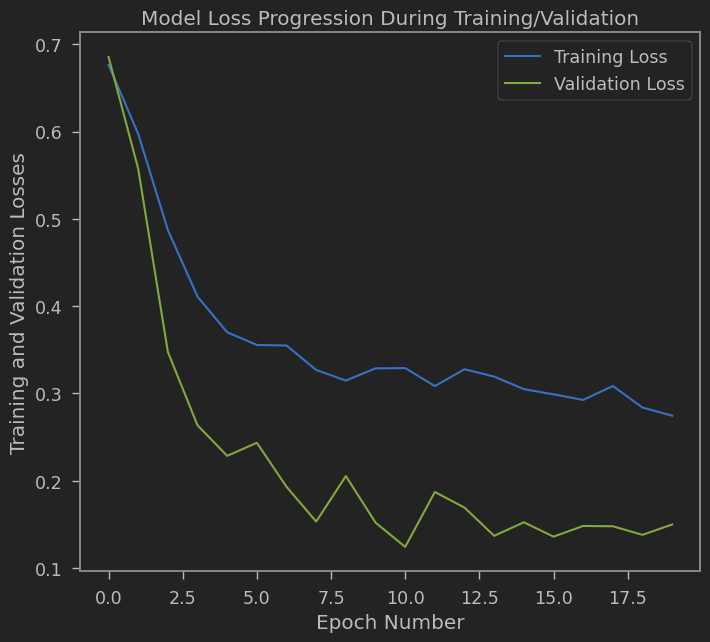

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])


In [ ]:
predicted = model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [ ]:
predicted_value = []
test = []
for i in predicted:
    predicted_value.append(np.argmax(i))

for i in y_test:
    test.append(np.argmax(i))

In [ ]:
print(classification_report(test, predicted_value))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87        60
           1       0.87      0.88      0.88        60

    accuracy                           0.88       120
   macro avg       0.88      0.88      0.87       120
weighted avg       0.88      0.88      0.87       120



<Axes: >

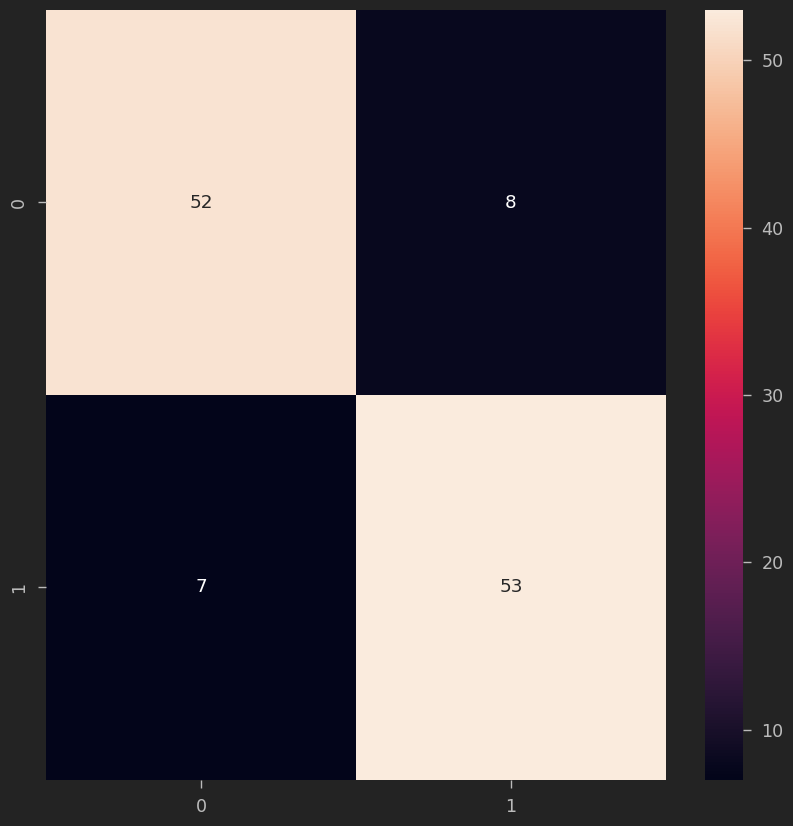

In [ ]:
plt.figure(figsize = (10, 10))
cm = confusion_matrix(test, predicted_value)
sns.heatmap(cm, annot = True)